In [1]:
from keras import layers
from keras.datasets import mnist
from keras.layers import Dropout
from tensorflow import keras

# import plotly.express as px

2022-04-09 19:27:24.339456: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-09 19:27:24.339510: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
def get_mnist_model():
    inputs = keras.Input(shape=(28*28,))
    features = layers.Dense(256, activation='relu')(inputs)
    features = Dropout(0.2)(features)
    features = layers.Dense(512, activation='relu')(inputs)
    features = layers.Dense(1024, activation='relu')(inputs)
    features = Dropout(0.2)(features)
    outputs = layers.Dense(10, activation='softmax')(features)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28*28)).astype("float32") / 255

train_images, val_images = train_images[10000:], train_images[:10000]
train_labels, val_labels = train_labels[10000:], train_labels[:10000]

In [8]:
model = get_mnist_model()
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

2022-04-09 19:31:21.749316: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-09 19:31:21.749379: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-09 19:31:21.749417: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (linux): /proc/driver/nvidia/version does not exist
2022-04-09 19:31:21.808176: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              803840    
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [12]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='mnistModel.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [13]:
tensorboard = keras.callbacks.TensorBoard(log_dir='/home/avizyt/PycharmProjects/deepflow/logs')

In [14]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_data=(val_images, val_labels), callbacks=[tensorboard])

2022-04-09 19:37:12.699794: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 156800000 exceeds 10% of free system memory.


Epoch 1/20
1563/1563 [==============================] - 19s 11ms/step - loss: 0.2179 - accuracy: 0.9344 - val_loss: 0.1085 - val_accuracy: 0.9682
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0954 - accuracy: 0.9706 - val_loss: 0.0888 - val_accuracy: 0.9722
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0667 - accuracy: 0.9783 - val_loss: 0.0747 - val_accuracy: 0.9787
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0501 - accuracy: 0.9842 - val_loss: 0.0808 - val_accuracy: 0.9756
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0416 - accuracy: 0.9863 - val_loss: 0.0720 - val_accuracy: 0.9804
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0337 - accuracy: 0.9888 - val_loss: 0.0729 - val_accuracy: 0.9802
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0296 - accuracy: 0.9899 - val_loss: 0.0775 - va

In [15]:
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

313/313 [==============================] - 2s 5ms/step - loss: 0.1061 - accuracy: 0.9831


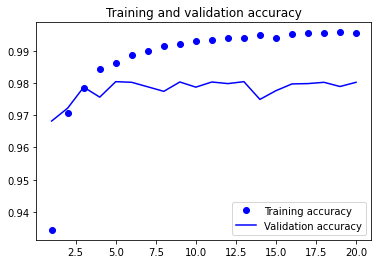

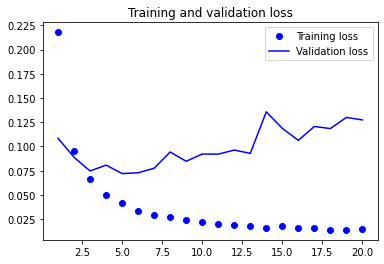

In [16]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


In [13]:
train_loss = history_model.history['loss']
epochs = range(1, 21)
fig2 = px.line(x=epochs, y=train_loss, labels={'x': 'epochs', 'y': 'train loss'})
fig2.show()

In [14]:
val_loss = history_model.history['val_loss']
epochs = range(1, 21)
fig1 = px.line(x=epochs, y=val_loss, labels={'x': 'epochs', 'y': 'val loss'})
fig1.show()